# Reading the titanic-data

In [42]:
import pandas as pd
from warnings import filterwarnings
filterwarnings(action='ignore')
pd.set_option('max_columns',30)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
new_test_y = pd.read_csv('gender_submission.csv')
join_temp = new_test_y
new_test_y.pop('PassengerId')
new_test_y = new_test_y.values.reshape(-1,)
train_data.tail(5)
test_data.shape

(418, 11)

# Dropping columns(passengerid,name,ticket,cabin,fare,embarked)

In [43]:
droped_train_data = train_data.drop(labels = ['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
droped_train_data.pop('Fare')
droped_train_data.head(5)
test_data.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [44]:
droped_test_data = test_data.drop(labels = ['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
droped_test_data.pop('Fare')


0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

# missing value treatment

In [45]:
droped_dummy = pd.get_dummies(droped_train_data['Sex'])
new_train = pd.concat([droped_train_data,droped_dummy],axis=1)
new_train.pop('Sex')
new_train.pop('female')
new_train.fillna(method='bfill',inplace=True)
new_train["Age"].fillna(method='ffill',inplace=True)
new_train.isna().sum()
new_train.head(5)

Survived  Pclass   Age  SibSp  Parch  male
0         0       3  22.0      1      0     1
1         1       1  38.0      1      0     0
2         1       3  26.0      0      0     0
3         1       1  35.0      1      0     0
4         0       3  35.0      0      0     1

In [46]:
droped_dummy = pd.get_dummies(droped_test_data['Sex'])
new_test_x = pd.concat([droped_test_data,droped_dummy],axis=1)
new_test_x.pop('Sex')
new_test_x.pop('female')
new_test_x.head(5)
new_test_x.fillna(method='bfill',inplace=True)
new_test_x["Age"].fillna(method='ffill',inplace=True)
new_test_x.isna().sum()
new_test_x.head()


Pclass   Age  SibSp  Parch  male
0       3  34.5      0      0     1
1       3  47.0      1      0     0
2       2  62.0      0      0     1
3       3  27.0      0      0     1
4       3  22.0      1      1     0

# start: After removing outliers

In [47]:
join_train = new_train
join_test = pd.concat([new_test_x,join_temp],axis=1)
join_test.head(5)
join_train.shape

(891, 6)

In [48]:
join_train.shape

(891, 6)

In [49]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(join_train))
z_train = join_train[(z<3).all (axis=1)]
z_train.head(5)

Survived  Pclass   Age  SibSp  Parch  male
0         0       3  22.0      1      0     1
1         1       1  38.0      1      0     0
2         1       3  26.0      0      0     0
3         1       1  35.0      1      0     0
4         0       3  35.0      0      0     1

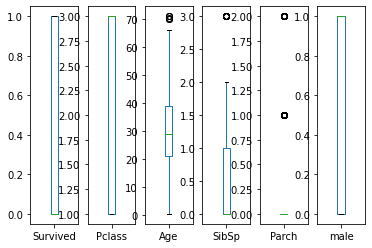

In [50]:
import matplotlib.pyplot as plt
z_train.plot(kind='box',sharex=False,subplots=True)
plt.show()

In [51]:
z = np.abs(stats.zscore(join_test))
z_test = join_test[(z<2).all (axis=1)]
z_test.shape

(370, 6)

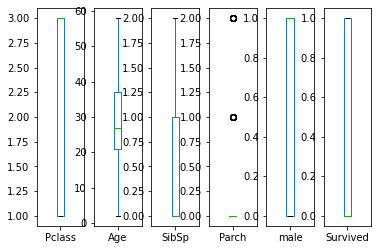

In [52]:
import matplotlib.pyplot as plt
z_test.plot(kind='box',sharex=False,subplots=True)
plt.show()

In [53]:
z_x_train,z_x_test,z_y_train,z_y_test = z_train.iloc[:,1:],z_test.iloc[:,:-1] ,z_train.iloc[:,[0]],z_test.iloc[:,-1]

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [55]:
modelx = LogisticRegression()
modelx.fit(z_x_train,z_y_train)
pred_yx=modelx.predict(z_x_test)
accuracy_score(z_y_test,pred_yx)


0.9648648648648649

In [56]:
modelx = SVC()
modelx.fit(z_x_train,z_y_train)
pred_yx=modelx.predict(z_x_test)
accuracy_score(z_y_test,pred_yx)

0.6648648648648648

In [57]:
modelx = KNeighborsClassifier(n_neighbors=7)
modelx.fit(z_x_train,z_y_train)
pred_yx=modelx.predict(z_x_test)
accuracy_score(z_y_test,pred_yx)

0.8162162162162162

In [58]:
modelx = GaussianNB()
modelx.fit(z_x_train,z_y_train)
pred_yx=modelx.predict(z_x_test)
accuracy_score(z_y_test,pred_yx)

0.9567567567567568

In [59]:
modelx = DecisionTreeClassifier(criterion='entropy',random_state=7)
modelx.fit(z_x_train,z_y_train)
pred_yx=modelx.predict(z_x_test)
accuracy_score(z_y_test,pred_yx)

0.8027027027027027

# End: Removing Outliers

# visualisation of training data

# Histogram

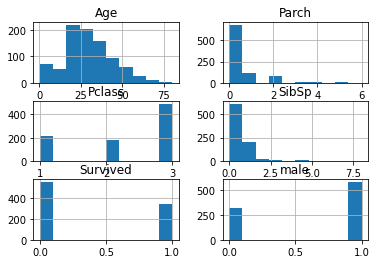

In [60]:
import matplotlib.pyplot as plt
new_train.hist()
plt.show()

# Density Plot

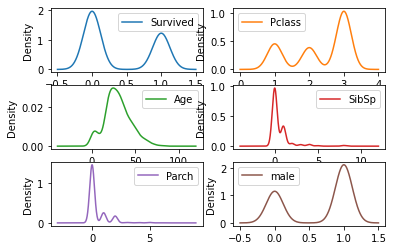

In [61]:
new_train.plot(kind='density',subplots=True,layout=(3,2),sharex=False)
plt.show()

# box plot

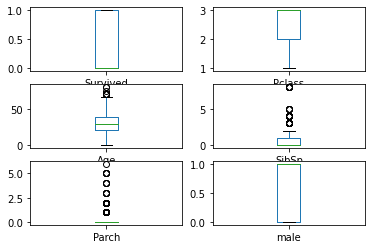

In [62]:
new_train.plot(kind='box',layout=(3,2),subplots=True,sharex=False)
plt.show()

# Scatter matrix plot

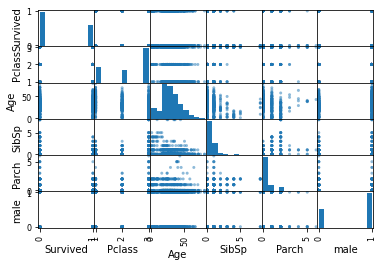

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_train)
plt.show()

# Visualisation of testing data

# Histogram

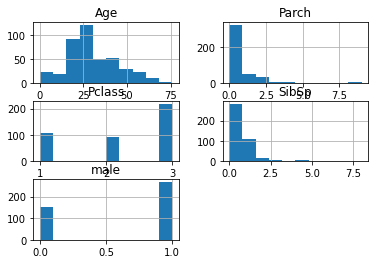

In [64]:
new_test_x.hist()
plt.show()

# Density Plot

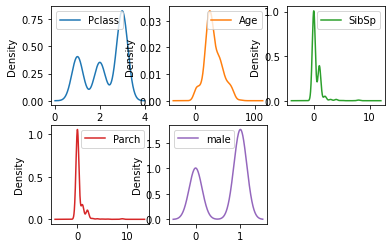

In [65]:
new_test_x.plot(kind='density',subplots=True,layout=(2,3),sharex=False)
plt.show()

# Box Plot

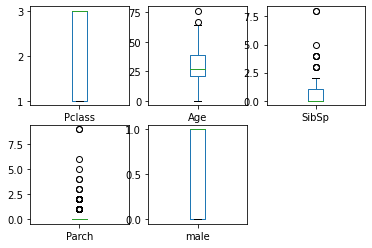

In [66]:
new_test_x.plot(kind='box',subplots=True,layout=(2,3),sharex=False)
plt.show()

# Scatter matrix

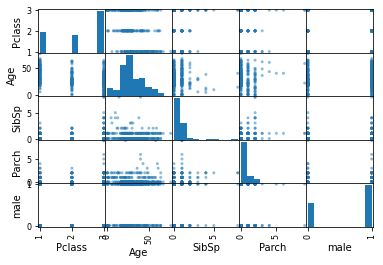

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_test_x)
plt.show()

# Breaking Dataset into training and testing parts

In [68]:
x_train,x_test,y_train,y_test = new_train.iloc[:,1:].values , new_test_x.iloc[:,:].values, new_train.iloc[:,[0]] , new_test_y

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
new_pred_y = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(new_test_y,new_pred_y)

0.9425837320574163

# Logistic Regression using standardscalar

In [70]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler()
std_x_train = stdscale.fit_transform(x_train)
std_x_test = stdscale.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(std_x_train,y_train)
pred_y1 = model1.predict(std_x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y1)

0.9473684210526315

# SVM using standardscalar

In [71]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(std_x_train,y_train)
pred_y2 = model2.predict(std_x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y2)

0.9521531100478469

# SVM using normal dataset

In [72]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)
pred_y3 = model3.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y3)

0.65311004784689

# K-NN using standardarized dataset

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=29)
model4.fit(std_x_train,y_train)
pred_y4 = model4.predict(std_x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y4)

0.9425837320574163

# K-NN using normal dataset

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=29)
model5.fit(x_train,y_train)
pred_y5 = model5.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y5)

0.7033492822966507

# Naive Bias using normal dataset

In [75]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train,y_train)
pred_y6 = model6.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y6)

0.9043062200956937

# Naive Bias using satandarized dataset

In [76]:
from sklearn.naive_bayes import GaussianNB
model7 = GaussianNB()
model7.fit(std_x_train,y_train)
pred_y7 = model7.predict(std_x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y7)

0.9641148325358851

# Decision tree using normal dataset

In [77]:
from sklearn.tree import DecisionTreeClassifier
model8 = DecisionTreeClassifier(criterion='entropy',random_state=0)
model8.fit(x_train,y_train)
pred_y8 = model8.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y8)

0.7918660287081339

# Decision Tree using standarized data

In [78]:
from sklearn.tree import DecisionTreeClassifier
model9 = DecisionTreeClassifier(criterion='entropy',random_state=0)
model9.fit(std_x_train,y_train)
pred_y9 = model9.predict(std_x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y9)

0.7822966507177034